In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=''
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pickle
import math
import pandas as pd
from scipy.signal import medfilt

In [2]:
with open('/home/prashanth/synthfeedback/Pickles/MNIST_NP.pkl','rb') as f:
    [np_err,np_al,np_acc,np_iteration,np_epoch]=pickle.load(f,encoding='latin1')

In [3]:
with open('/home/prashanth/synthfeedback/Pickles/MNIST-FA.pkl','rb') as f:
    fa_err,fa_al,fa_acc,fa_iteration=pickle.load(f,encoding='latin1')

In [4]:
with open('/home/prashanth/synthfeedback/Pickles/MNIST-BP.pkl','rb') as f:
    [bp_err,bp_acc,bp_iteration,bp_epoch]=pickle.load(f,encoding='latin1')

In [5]:
# import pandas as pd
mean_bp=np.mean(bp_err,axis=0)
mean_fa=np.mean(fa_err,axis=0)

mean_np=np.mean(np_err,axis=0)

mean_accbp=np.mean(bp_acc,axis=0)
mean_accfa=np.mean(fa_acc,axis=0)
mean_accnp=np.mean(np_acc,axis=0)

std_accbp=np.std(bp_acc,axis=0)
std_accfa=np.std(fa_acc,axis=0)
std_accnp=np.std(np_acc,axis=0)


std_bp=np.std(bp_err,axis=0)
std_fa=np.mean(fa_err,axis=0)
std_np=np.mean(np_err,axis=0)



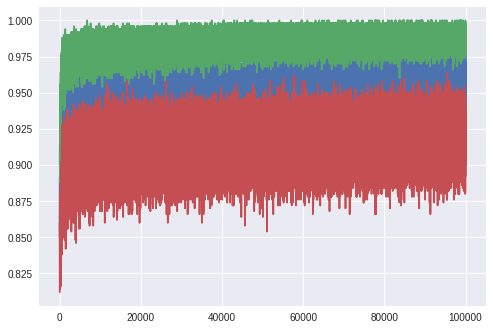

In [6]:
plt.plot(mean_accbp)
plt.plot(mean_accfa)
plt.plot(mean_accnp)
plt.show()

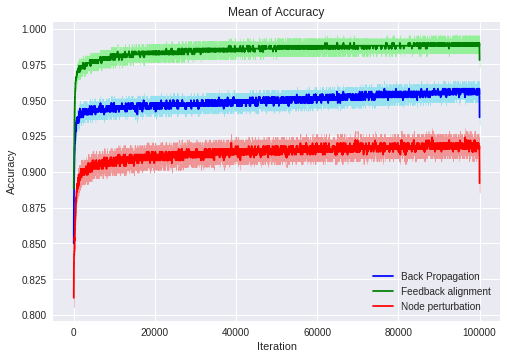

In [7]:
N=107
med_mean_accbp=medfilt(mean_accbp,N)
med_std_accbp=np.std(med_mean_accbp)
plt.plot(med_mean_accbp,label='Back Propagation',color="blue")
plt.fill_between(range(med_mean_accbp.shape[0]),med_mean_accbp-med_std_accbp,med_mean_accbp+med_std_accbp,color="#95E1F0")

med_mean_accfa=medfilt(mean_accfa,N)
med_std_accfa=np.std(med_mean_accfa)
plt.plot(med_mean_accfa,label='Feedback alignment',color="green")
plt.fill_between(range(med_mean_accfa.shape[0]),med_mean_accfa-med_std_accfa,med_mean_accfa+med_std_accfa,color="#95F09A")

med_mean_accnp=medfilt(mean_accnp,N)
med_std_accnp=np.std(med_mean_accnp)
plt.plot(med_mean_accnp,label='Node perturbation',color="red")
plt.fill_between(range(med_mean_accnp.shape[0]),med_mean_accnp-med_std_accnp,med_mean_accnp+med_std_accnp,color="#F09595" )
plt.title("Mean of Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Accuracy_Median_filter.pdf")
plt.show()

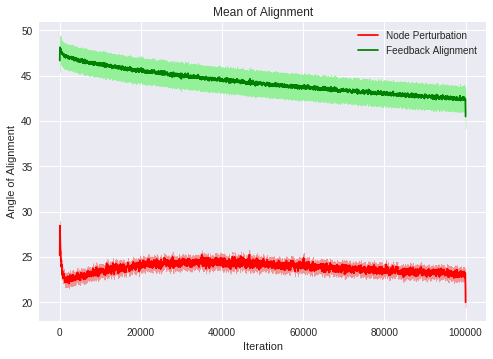

In [8]:
mean_fa_al=np.mean(np.degrees(np.arccos(fa_al)),axis=0)
# std_fa_al=np.std(np.degrees(np.arccos(fa_al)),axis=0)

med_mean_fa_al=medfilt(mean_fa_al,N)
med_std_fa_al=np.std(med_mean_fa_al)

mean_np_al=np.mean(np.degrees(np.arccos(np_al)),axis=0)
# std_np_al=np.std(np.degrees(np.arccos(np_al)),axis=0)

med_mean_np_al=medfilt(mean_np_al,N)
med_std_np_al=np.std(med_mean_np_al)
plt.plot(med_mean_np_al,label='Node Perturbation',color="red")
plt.fill_between(range(med_mean_np_al.shape[0]),med_mean_np_al-med_std_np_al,med_mean_np_al+med_std_np_al,color="#F09595")
plt.plot(med_mean_fa_al,label='Feedback Alignment',color="green")
plt.fill_between(range(med_mean_fa_al.shape[0]),med_mean_fa_al-med_std_fa_al,med_mean_fa_al+med_std_fa_al,color="#95F09A")
plt.title("Mean of Alignment")
plt.xlabel("Iteration")
plt.ylabel("Angle of Alignment")
plt.legend()
plt.savefig("Alignment(with median filter).pdf")
plt.show()

In [9]:
# plt.plot(mean_accbp,label='Back Propagation',color='blue')
# plt.fill_between(range(bp_iteration),mean_bp-std_bp,mean_bp+std_bp,color="#95E1F0")
# plt.plot(mean_accfa,label='Feedback alignment',color="green")

# plt.fill_between(range(bp_iteration),mean_fa-std_fa,mean_fa+std_fa,color="#95F09A")
# # plt.plot(np.mean(np_acc,axis=0),label='Node Perturbation',color="red")
# plt.plot(mean_accnp,label='Node Perturbation',color="red")
# plt.fill_between(range(bp_iteration),mean_np-std_np,mean_np+std_np,color="#F09595")
# plt.xlabel("Iteration")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.title("Mean of Accuracy(without moving average filter)")
# plt.show()

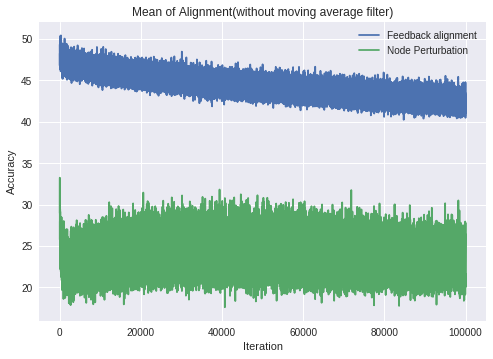

In [10]:

plt.plot(mean_fa_al,label='Feedback alignment')
plt.plot(mean_np_al,label='Node Perturbation')
# plt.fill_between(range(bp_iteration),mean_fa-std_fa,mean_fa+std_fa)
# plt.plot(np.mean(np_acc,axis=0),label='Node Perturbation')
# plt.fill_between(range(bp_iteration),mean_np-std_np,mean_np+std_np)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Mean of Alignment(without moving average filter)")
plt.show()

In [11]:
# plt.plot(np.std(np_acc,axis=0),label='Node Perturbation')
# plt.plot(np.std(fa_acc,axis=0),label='Feedback alignment')
# plt.plot(np.std(bp_acc,axis=0),label='Back Propagation')
# plt.title("Standard deviation of Accuracy")
# plt.xlabel("Iteration")
# plt.ylabel("loss")
# plt.legend()
# plt.show()

In [12]:
# plt.plot(np.mean(np_err,axis=0),label='Node Perturbation')
# plt.plot(np.mean(fa_err,axis=0),label='Feedback alignment')
# plt.plot(np.mean(bp_err,axis=0),label='Back Propagation')
# plt.title("Mean of loss")
# plt.xlabel("Iteration")
# plt.ylabel("loss")
# plt.legend()
# plt.show()

In [13]:
# plt.plot(np.std(np_err,axis=0),label='Node Perturbation')
# plt.plot(np.std(fa_err,axis=0),label='Feedback alignment')
# plt.plot(np.std(bp_err,axis=0),label='Back Propagation')
# plt.title("Standard deviation of loss")
# plt.xlabel("Iteration")
# plt.ylabel("loss")
# plt.legend()
# plt.show()

In [14]:
# # plt.plot(np.std(np.degrees(np.arccos(np_al)),axis=0),label='Node Perturbation')
# plt.plot(np.std(np.degrees(np.arccos(fa_al)),axis=0),label='Feedback Alignment')
# plt.title("Standard Deviation of Alignment")
# plt.xlabel("Iteration")
# plt.ylabel("Angle Alignment")
# plt.legend()
# plt.show()

In [15]:
# acc=np.zeros((bp_iteration*3))
# acc[0:bp_iteration]=mean_accbp
# acc[bp_iteration:bp_iteration*2]=mean_accfa
# acc[bp_iteration*2:bp_iteration*3]=mean_accnp

# std_acc=np.zeros((bp_iteration*3))
# std_acc[0:bp_iteration]=std_accbp
# std_acc[bp_iteration:bp_iteration*2]=std_accfa
# std_acc[bp_iteration*2:bp_iteration*3]=std_accnp

# std=np.zeros((bp_iteration*3))
# std[0:bp_iteration]=std_bp
# std[bp_iteration:bp_iteration*2]=std_fa
# std[bp_iteration*2:bp_iteration*3]=std_np


# '''id=0 BP
#    id=1 FA
#    id=2 NP'''
# error=np.zeros((bp_iteration*3))
# error[0:bp_iteration]=mean_bp
# error[bp_iteration:bp_iteration*2]=mean_fa
# error[bp_iteration*2:bp_iteration*3]=mean_np

# rando=[i for i in range(bp_iteration)]
# Iter=np.zeros((bp_iteration*3))
# Iter[0:bp_iteration]=rando
# Iter[bp_iteration:bp_iteration*2]=rando
# Iter[bp_iteration*2:bp_iteration*3]=rando

# id=np.zeros((bp_iteration*3))
# id[0:bp_iteration]=0
# id[bp_iteration:bp_iteration*2]=1
# id[bp_iteration*2:bp_iteration*3]=2
# data={'Iteration':Iter,
#     'MeanError':error, 
#      'id':id,
#      'StdError':std,
#       'MeanAcc':acc,
#       'StdAcc':std_acc
#      }


#     ax14 = sns.tsplot(data = long_total_cluster_capacity_overload_df, value = "Overload", time = "Week", condition = "Cluster")


In [16]:
# df=pd.DataFrame(data,columns=['Iteration','MeanError','id','StdError','MeanAcc','StdAcc'])
# df['Unit'] = df.groupby(['id','Iteration']).cumcount()
# ax=sns.tsplot(data=df,time="Iteration",value="MeanError",condition="id",unit="Unit",err_style="range_band")
# plt.title("Mean of loss")
# plt.show()

In [17]:
# ax=sns.tsplot(data=df,time="Iteration",value="StdError",condition="id",unit="Unit",err_style="range_band")
# plt.title("Standard Deviation of loss")
# plt.show()

In [18]:
# ax=sns.tsplot(data=df,time="Iteration",value="MeanAcc",condition="id",unit="Unit",err_style="range_band")
# plt.title("Mean Accuracies")
# plt.show()

In [19]:
# ax=sns.tsplot(data=df,time="Iteration",value="StdAcc",condition="id",unit="Unit",err_style="range_band")
# plt.title("Standard Deviation of Accuracies")
# plt.show()

In [20]:
# n = 100 # the larger n is, the smoother curve will be
# b = [1.0 / n] * n
# a = 1
# yy_bp = lfilter(b,a,bp_acc)
# yy_fa = lfilter(b,a,fa_acc)
# yy_np= lfilter(b,a,np_acc)
# plt.plot( yy_bp, linewidth=2, linestyle="-",label='Back Propagation')
# plt.plot(yy_np,linewidth=2, linestyle="-",label='Node Perturbation')
# plt.plot( yy_fa, linewidth=2, linestyle="-",label='Random Feedback')
# plt.suptitle('After filtering the accuracies')
# plt.legend()
# plt.ylabel('Accuracy')
# plt.show()